# **Importing Libraries**

In [ ]:
!pip install keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 37.9 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_predict, cross_val_score
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import keras_cv

Using TensorFlow backend


#**Loading CIFAR 10 Dataset and Displaying Details**

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
augmented_images[9]

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]], dtype=uint8)
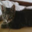

In [ ]:
train_images[9]

# **Displaying 5 Images with corresponding labels**

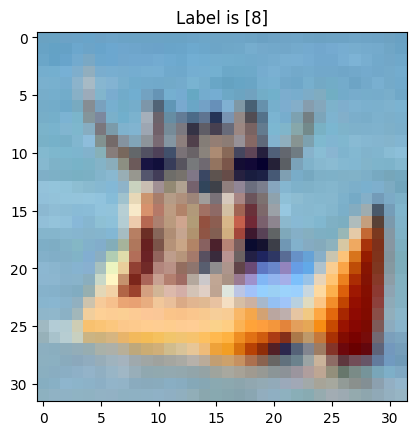

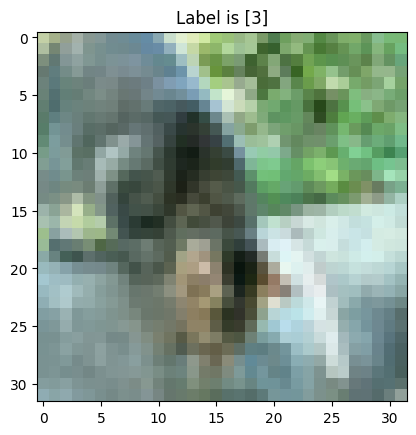

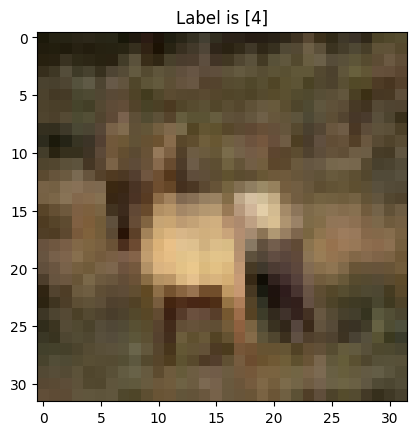

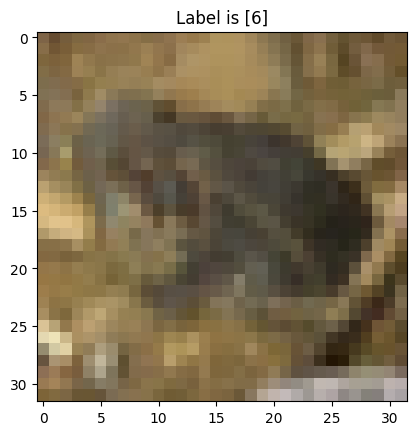

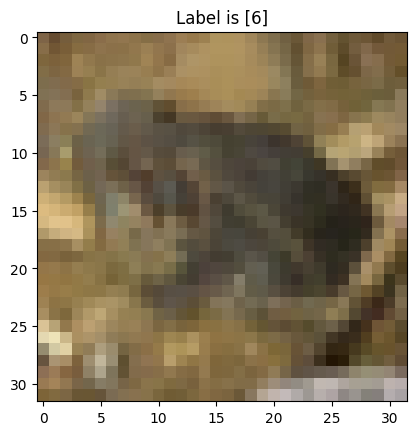

In [ ]:
randomNolist=[]
for i in range(5):
  randomNolist.append(random.randint(0,100))
for i in randomNolist:
  label = train_labels[i]
  pixel = train_images[i]
  pixel = np.array(pixel, dtype='uint8')
  # pixel = pixel.reshape((28,28))
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixel, cmap='gray')
  plt.show()

# **Flattening**

## **Flatten Images**

In [ ]:
x_train = train_images.reshape(train_images.shape[0], -1)
x_test = test_images.reshape(test_images.shape[0], -1)

## **Flatten Labels**

In [ ]:
y_train = train_labels.ravel()
y_test = test_labels.ravel()

# **Normalizing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

#**Training Without Splitting the dataset**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

##**Predict Testing Label**

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.54      0.53      1000
           2       0.38      0.33      0.35      1000
           3       0.33      0.28      0.30      1000
           4       0.39      0.38      0.39      1000
           5       0.43      0.40      0.41      1000
           6       0.47      0.57      0.52      1000
           7       0.51      0.45      0.48      1000
           8       0.58      0.61      0.59      1000
           9       0.47      0.52      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



#**Split Dataset 80:20**

##**Splitting Datset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

##**Model Training**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

##**Predict Validation Label**

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.51       973
           1       0.47      0.53      0.50       979
           2       0.37      0.29      0.33      1030
           3       0.35      0.28      0.31      1023
           4       0.35      0.41      0.38       933
           5       0.40      0.36      0.38      1015
           6       0.46      0.55      0.50       996
           7       0.50      0.45      0.48       994
           8       0.58      0.59      0.58      1017
           9       0.50      0.56      0.53      1040

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.45     10000
weighted avg       0.45      0.45      0.45     10000



##**Predict Testing Label**

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.46

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1000
           1       0.51      0.55      0.53      1000
           2       0.36      0.31      0.34      1000
           3       0.35      0.28      0.31      1000
           4       0.38      0.39      0.39      1000
           5       0.42      0.39      0.40      1000
           6       0.46      0.53      0.49      1000
           7       0.50      0.44      0.47      1000
           8       0.58      0.62      0.60      1000
           9       0.48      0.54      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



#**3 Fold Cross Validation**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=3, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 45.43%
Fold 2 Accuracy: 45.04%
Fold 3 Accuracy: 44.93%

Mean Accuracy: 45.13%
Standard Deviation: 0.21%


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

#**Gray Scale Image**

# #**Gray Scale Conversion**

In [ ]:
to_grayscale = keras_cv.layers.Grayscale()
train_images = to_grayscale(train_images)
train_images

<tf.Tensor: shape=(50000, 32, 32, 1), dtype=float32, numpy=
array([[[[ 61.2111   ],
         [ 44.984703 ],
         [ 48.023003 ],
         ...,
         [137.0222   ],
         [130.4358   ],
         [128.76721  ]],

        [[ 18.8024   ],
         [  0.       ],
         [ 10.0762005],
         ...,
         [ 94.6907   ],
         [ 89.9901   ],
         [ 94.03281  ]],

        [[ 23.954502 ],
         [  8.8914   ],
         [ 31.4071   ],
         ...,
         [ 90.2782   ],
         [ 90.876    ],
         [ 80.21911  ]],

        ...,

        [[172.90521  ],
         [153.76591  ],
         [156.65321  ],
         ...,
         [133.875    ],
         [ 35.733402 ],
         [ 38.0797   ]],

        [[146.339    ],
         [128.6987   ],
         [143.5434   ],
         ...,
         [152.5896   ],
         [ 69.2633   ],
         [ 59.7957   ]],

        [[150.6573   ],
         [136.6542   ],
         [146.7751   ],
         ...,
         [188.53041  ],
         [123.97

In [ ]:
to_grayscale = keras_cv.layers.Grayscale()
test_images = to_grayscale(test_images)
test_images

<tf.Tensor: shape=(10000, 32, 32, 1), dtype=float32, numpy=
array([[[[118.5562   ],
         [118.0401   ],
         [123.22451  ],
         ...,
         [100.8183   ],
         [ 95.1824   ],
         [ 88.3294   ]],

        [[116.99081  ],
         [114.2639   ],
         [119.5731   ],
         ...,
         [ 99.9494   ],
         [ 94.4275   ],
         [ 91.1011   ]],

        [[115.061905 ],
         [112.8789   ],
         [116.4872   ],
         ...,
         [102.949104 ],
         [ 98.498    ],
         [ 91.873    ]],

        ...,

        [[113.29121  ],
         [ 88.1258   ],
         [ 76.5399   ],
         ...,
         [ 84.9412   ],
         [ 53.7657   ],
         [ 76.329    ]],

        [[105.476906 ],
         [ 91.392105 ],
         [ 75.404495 ],
         ...,
         [ 70.7254   ],
         [ 71.1661   ],
         [ 55.744003 ]],

        [[ 97.1896   ],
         [ 95.3594   ],
         [ 80.7415   ],
         ...,
         [ 66.5086   ],
         [ 74.17

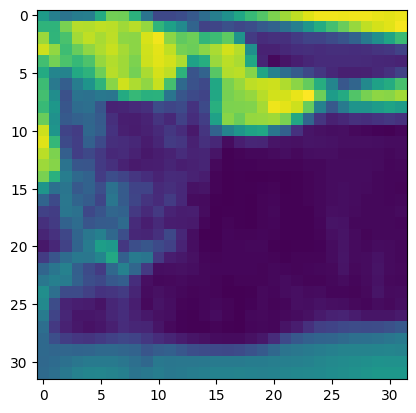

In [ ]:
plt.imshow(train_images[9])

# **Displaying 5 Images with corresponding labels**

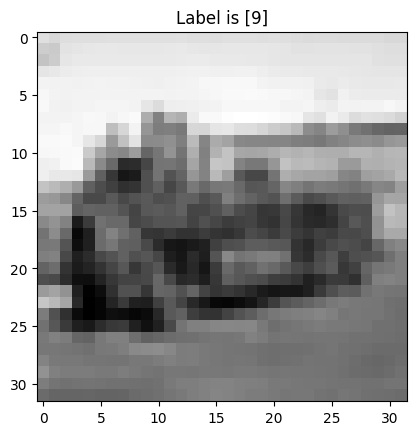

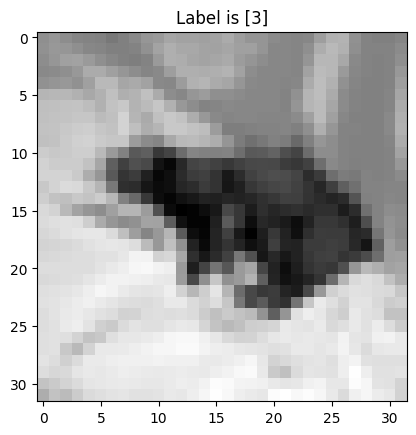

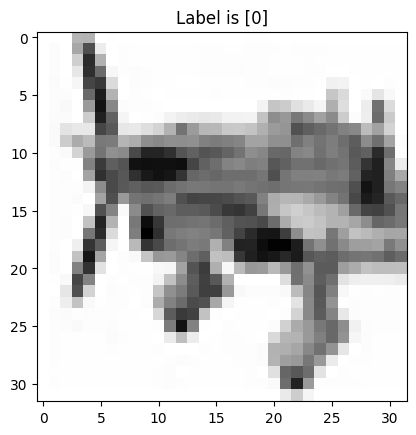

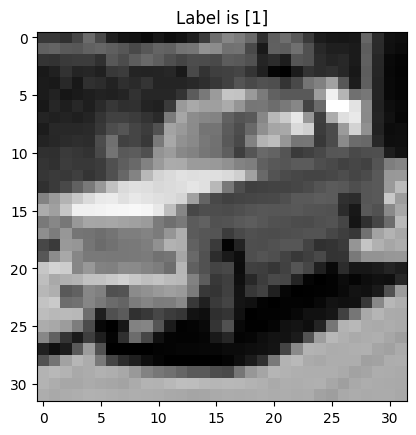

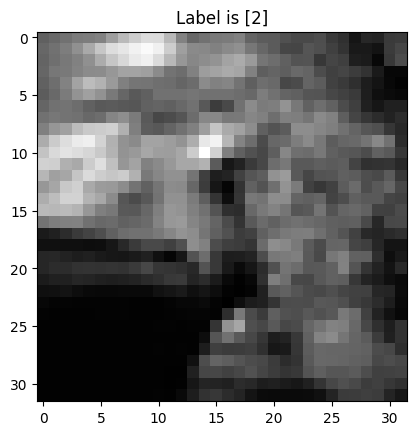

In [ ]:
randomNolist=[]
for i in range(5):
  randomNolist.append(random.randint(0,100))
for i in randomNolist:
  label = train_labels[i]
  pixel = train_images[i]
  pixel = np.array(pixel, dtype='uint8')
  # pixel = pixel.reshape((28,28))
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixel, cmap='gray')
  plt.show()

# **Flattening**

## **Flatten Images**

In [ ]:
# x_train = train_images.reshape(train_images.shape[0], -1)
# x_test = test_images.reshape(test_images.shape[0], -1)

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

## **Flatten Labels**

In [ ]:
y_train = train_labels.ravel()
y_test = test_labels.ravel()

# **Normalizing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

#**Training Without Splitting the dataset**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

##**Predict Testing Label**

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.54      0.53      1000
           2       0.38      0.33      0.35      1000
           3       0.33      0.28      0.30      1000
           4       0.39      0.38      0.39      1000
           5       0.43      0.40      0.41      1000
           6       0.47      0.57      0.52      1000
           7       0.51      0.45      0.48      1000
           8       0.58      0.61      0.59      1000
           9       0.47      0.52      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



#**Split Dataset 80:20**

##**Splitting Datset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

##**Model Training**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

##**Predict Validation Label**

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.51       973
           1       0.47      0.53      0.50       979
           2       0.37      0.29      0.33      1030
           3       0.35      0.28      0.31      1023
           4       0.35      0.41      0.38       933
           5       0.40      0.36      0.38      1015
           6       0.46      0.55      0.50       996
           7       0.50      0.45      0.48       994
           8       0.58      0.59      0.58      1017
           9       0.50      0.56      0.53      1040

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.45     10000
weighted avg       0.45      0.45      0.45     10000



##**Predict Testing Label**

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.46

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1000
           1       0.51      0.55      0.53      1000
           2       0.36      0.31      0.34      1000
           3       0.35      0.28      0.31      1000
           4       0.38      0.39      0.39      1000
           5       0.42      0.39      0.40      1000
           6       0.46      0.53      0.49      1000
           7       0.50      0.44      0.47      1000
           8       0.58      0.62      0.60      1000
           9       0.48      0.54      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



#**3 Fold Cross Validation**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=3, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 45.80%
Fold 2 Accuracy: 45.17%
Fold 3 Accuracy: 45.42%

Mean Accuracy: 45.46%
Standard Deviation: 0.26%


#**5 Fold Cross Validation**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 45.65%
Fold 2 Accuracy: 44.80%
Fold 3 Accuracy: 46.29%
Fold 4 Accuracy: 45.52%
Fold 5 Accuracy: 45.70%

Mean Accuracy: 45.59%
Standard Deviation: 0.48%


#**10 Fold Cross Validation**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Perform 3-fold cross-validation
scores = cross_val_score(rf_classifier, x_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 47.32%
Fold 2 Accuracy: 45.96%
Fold 3 Accuracy: 47.04%
Fold 4 Accuracy: 44.62%
Fold 5 Accuracy: 47.10%
Fold 6 Accuracy: 46.60%
Fold 7 Accuracy: 45.74%
Fold 8 Accuracy: 46.08%
Fold 9 Accuracy: 45.68%
Fold 10 Accuracy: 45.94%

Mean Accuracy: 46.21%
Standard Deviation: 0.78%
